In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
AA3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K','ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W','ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
AA1to3 = {}
for i in range(len(list(AA3to1.keys()))):
    AA1to3[list(AA3to1.values())[i]] = list(AA3to1.keys())[i]

In [5]:
AA = 'SSGLVPRGSHMRGPNPTAASLEASAGPFTVRSFTVSRPSGYGAGTVYYPTNAGGTVGAIAIVPGYTARQSSIKWWGPRLASHGFVVITIDTNSTLDQPSSRSSQQMAALRQVASLNGTSSSPIYGKVDTARMGVMGWSMGGGGSLISAANNPSLKAAAPQAPWDSSTNFSSVTVPTLIFACENDSIAPVNSSALPIYDSMSRNAKQFLEINGGSHSCANSGNSNQALIGKKGVAWMKRFMDNDTRYSTFACENPNSTRVSDFRTANCSLEDPAANKARKEAELAAATAEQ'
Am = list(AA)
Am3 = []
for i in range(len(Am)):
    Am3.append(AA1to3[Am[i]])

In [6]:
CodonDict={'ATT':'I',   'ATC':'I',  'ATA':'I',  'CTT':'L',  'CTC':'L',  
'CTA':'L',  'CTG':'L',  'TTA':'L',  'TTG':'L',  'GTT':'V',  'GTC':'V',  
'GTA':'V',  'GTG':'V',  'TTT':'F',  'TTC':'F',  'ATG':'M',  'TGT':'C',  
'TGC':'C',  'GCT':'A',  'GCC':'A',  'GCA':'A',  'GCG':'A',  'GGT':'G',  
'GGC':'G',  'GGA':'G',  'GGG':'G',  'CCT':'P',  'CCC':'P',  'CCA':'P',  
'CCG':'P',  'ACT':'T',  'ACC':'T',  'ACA':'T',  'ACG':'T',  'TCT':'S',  
'TCC':'S',  'TCA':'S',  'TCG':'S',  'AGT':'S',  'AGC':'S',  'TAT':'Y',  
'TAC':'Y',  'TGG':'W',  'CAA':'Q',  'CAG':'Q',  'AAT':'N',  'AAC':'N',  
'CAT':'H',  'CAC':'H',  'GAA':'E',  'GAG':'E',  'GAT':'D',  'GAC':'D',  
'AAA':'K',  'AAG':'K',  'CGT':'R',  'CGC':'R',  'CGA':'R',  'CGG':'R',  
'AGA':'R',  'AGG':'R',  'TAA':'X',  'TAG':'X',  'TGA':'X'}

In [7]:
AAtoGEN = {}
for i in range(len(list(CodonDict.keys()))):
    AAtoGEN[list(CodonDict.values())[i]] = list(CodonDict.keys())[i]

In [8]:
Gen = []
for i in range(len(Am)):
    Gen.append(AAtoGEN[Am[i]])

In [9]:
Gen = np.array(Gen)

In [10]:
Gen

array(['AGC', 'AGC', 'GGG', 'TTG', 'GTG', 'CCG', 'AGG', 'GGG', 'AGC',
       'CAC', 'ATG', 'AGG', 'GGG', 'CCG', 'AAC', 'CCG', 'ACG', 'GCG',
       'GCG', 'AGC', 'TTG', 'GAG', 'GCG', 'AGC', 'GCG', 'GGG', 'CCG',
       'TTC', 'ACG', 'GTG', 'AGG', 'AGC', 'TTC', 'ACG', 'GTG', 'AGC',
       'AGG', 'CCG', 'AGC', 'GGG', 'TAC', 'GGG', 'GCG', 'GGG', 'ACG',
       'GTG', 'TAC', 'TAC', 'CCG', 'ACG', 'AAC', 'GCG', 'GGG', 'GGG',
       'ACG', 'GTG', 'GGG', 'GCG', 'ATA', 'GCG', 'ATA', 'GTG', 'CCG',
       'GGG', 'TAC', 'ACG', 'GCG', 'AGG', 'CAG', 'AGC', 'AGC', 'ATA',
       'AAG', 'TGG', 'TGG', 'GGG', 'CCG', 'AGG', 'TTG', 'GCG', 'AGC',
       'CAC', 'GGG', 'TTC', 'GTG', 'GTG', 'ATA', 'ACG', 'ATA', 'GAC',
       'ACG', 'AAC', 'AGC', 'ACG', 'TTG', 'GAC', 'CAG', 'CCG', 'AGC',
       'AGC', 'AGG', 'AGC', 'AGC', 'CAG', 'CAG', 'ATG', 'GCG', 'GCG',
       'TTG', 'AGG', 'CAG', 'GTG', 'GCG', 'AGC', 'TTG', 'AAC', 'GGG',
       'ACG', 'AGC', 'AGC', 'AGC', 'CCG', 'ATA', 'TAC', 'GGG', 'AAG',
       'GTG', 'GAC',

In [11]:
def R(g, ga, mu):
    d = ( g - ga )**2.0 + ( 2*g + 2*ga + mu )*mu
    return np.sqrt(d)
def W(g, ga, mu):
    return g + ga + mu
def C(t, R):
    return np.cosh(R*t*0.5)
def S(t, R):
    return np.sinh(R*t*0.5)
def G(s, t, g, ga, mu,n):
    R_ = R(g,ga,mu)
    W_ = W(g,ga,mu)
    num = ( W_*S(t,R_) - R_ * C(t,R_) )*np.exp(s) - 2.0 * ga * S(t,R_)
    den = 2.0*g*S(t,R_)*np.exp(s) - W_*S(t,R_) - R_*C(t,R_)
    return (num/den)**2.0

In [37]:
def t_m(g, ga, mu, n):
    r = np.random.random()
    r = r ** (1.0/n)
    R_ = R(g,ga,mu)
    W_ = W(g,ga,mu)
    num = r * (R_-W_+2.0*g)-W_-R_+2*ga
    den = r * (-R_-W_+2.0*g)-W_+R_+2*ga
    l = num/den
    t = 1.0/R_ * np.log(l)
    return t,r

In [38]:
def t_x(g,ga,mu,n):
    R_ = R(g,ga,mu)
    W_ = W(g,ga,mu)
    num = R_-W_+2.0*ga
    den = R_+W_-2.0*ga
    l = (num/den) ** n 
    return l

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


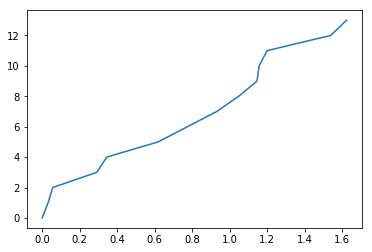

In [58]:
N = 1000
n=100
g=1.0 * n
ga=1.0 * n
mu=0.001 * n
t = [0]
pob = np.zeros(n)
n_mu = [0]
for i in range(1,N):
    summ = n
    #g = g * summ
    #ga = ga * summ
    #mu = mu * summ
    t_new,r = t_m(g,ga,mu,summ)
    alpha = np.random.random()
    
    if(r>t_x(g,ga,mu,summ)):
        n_mu.append(n_mu[i-1] + 1)
        t.append(t[i-1]+t_new)
    else:
        print(1)
        
plt.plot(t,n_mu) 
plt.show()   

In [55]:
mu

0.001